In [43]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import pandas as pd

In [44]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      # Your code ends here 
        reader = csv.reader(training_file, delimiter=',')
        imgs = []
        labels = []

        next(reader, None)

        for row in reader:
            label = row[0]
            pixel = row[1:]
            img = np.array(pixel).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [45]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3)# Your Code Here
testing_images = np.expand_dims(testing_images, axis = 3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
    # Your Code Here)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [46]:
train_generator = train_datagen.flow(
    training_images,
    training_labels,
  batch_size=64
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
  batch_size=64
)

In [52]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/25
429/429 [==============================] - 22s 50ms/step - loss: 3.0175 - accuracy: 0.1005 - val_loss: 1.9608 - val_accuracy: 0.4031
Epoch 2/25
429/429 [==============================] - 22s 51ms/step - loss: 2.2677 - accuracy: 0.2916 - val_loss: 1.4933 - val_accuracy: 0.4919
Epoch 3/25
429/429 [==============================] - 22s 51ms/step - loss: 1.8036 - accuracy: 0.4248 - val_loss: 1.4419 - val_accuracy: 0.5038
Epoch 4/25
429/429 [==============================] - 23s 53ms/step - loss: 1.5318 - accuracy: 0.5034 - val_loss: 1.0123 - val_accuracy: 0.6272
Epoch 5/25
429/429 [==============================] - 21s 49ms/step - loss: 1.3254 - accuracy: 0.5649 - val_loss: 0.8422 - val_accuracy: 0.6963
Epoch 6/25
429/429 [==============================] - 22s 52ms/step - loss: 1.1687 - accuracy: 0.6165 - val_loss: 0.7094 - val_accuracy: 0.7627
Epoch 7/25
429/429 [==============================] - 21s 48ms/step - loss: 1.0564 - accuracy: 0.6555 - val_loss: 0.7253 - val_accuracy:

[357.9136657714844, 0.5352760553359985]

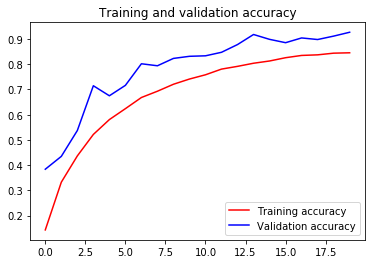

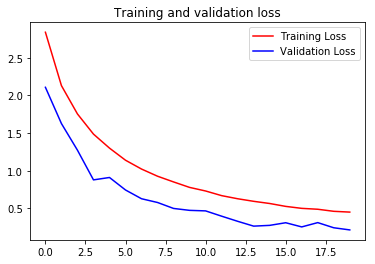

In [50]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()